<a href="https://colab.research.google.com/github/PriyaG26/Analysis_of_Superstore/blob/main/DA_Superstore_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries

In [ ]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt
import statsmodels.api as sm

1.5.3
1.22.4
0.12.2


#Extracting file from Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/DA_Superstore

/content/drive/MyDrive/DA_Superstore


In [ ]:
mydf = pd.read_csv("Superstore_Dataset.csv")

#Characteristics of the Dataset

In [ ]:
mydf

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
mydf = mydf.drop(['Postal Code'], axis=1)

In [ ]:
mydf = mydf.drop(['Country'], axis=1)

In [ ]:
mydf

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
print(mydf["Ship Mode"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [ ]:
print(mydf["Segment"].unique())

['Consumer' 'Corporate' 'Home Office']


In [ ]:
print(mydf["Category"].unique())

['Furniture' 'Office Supplies' 'Technology']


In [ ]:
print(mydf["Sub-Category"].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
print(mydf["Region"].unique())

['South' 'West' 'Central' 'East']


In [ ]:
print(mydf["State"].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [ ]:
print(mydf["City"].unique())

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersburg'

In [ ]:
mydf.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [ ]:
mydf['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

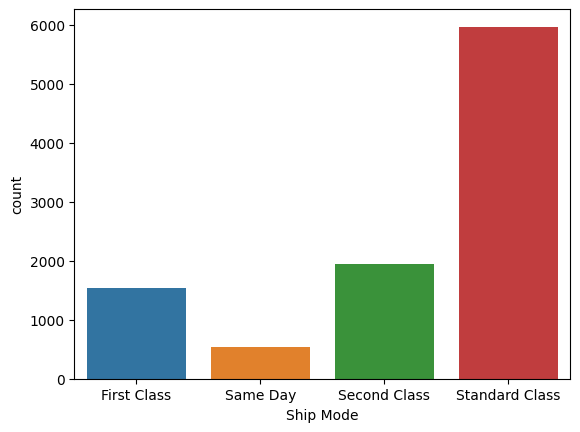

In [ ]:
mydf["Ship Mode"] = mydf["Ship Mode"].astype("category")
sns.countplot(x="Ship Mode", data = mydf)

In [ ]:
mydf['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<Axes: xlabel='Segment', ylabel='count'>

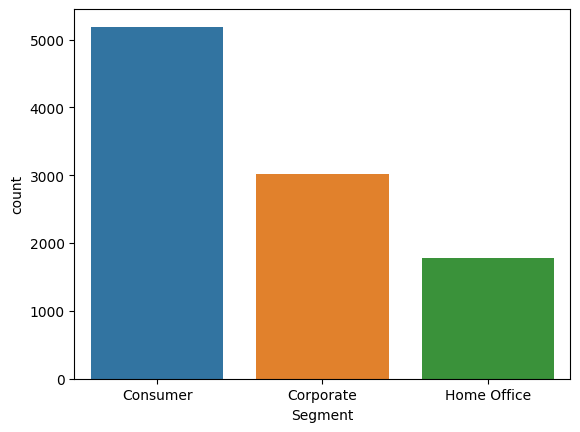

In [ ]:
mydf["Segment"] = mydf["Segment"].astype("category")
sns.countplot(x="Segment", data = mydf)

In [ ]:
mydf['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

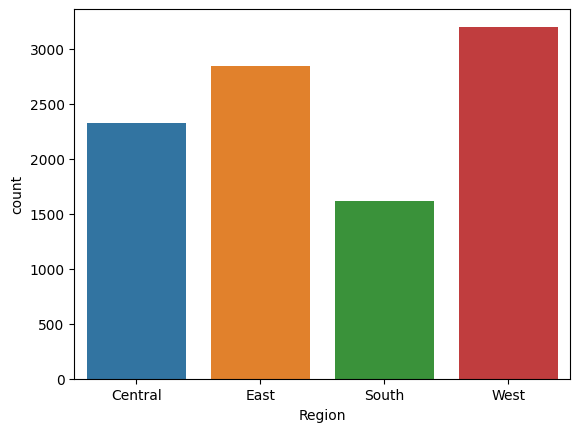

In [ ]:
mydf["Region"] = mydf["Region"].astype("category")
sns.countplot(x="Region", data = mydf)

In [ ]:
mydf.groupby('Category')['Sub-Category'].value_counts()

Category         Sub-Category
Furniture        Furnishings      957
                 Chairs           617
                 Tables           319
                 Bookcases        228
Office Supplies  Binders         1523
                 Paper           1370
                 Storage          846
                 Art              796
                 Appliances       466
                 Labels           364
                 Envelopes        254
                 Fasteners        217
                 Supplies         190
Technology       Phones           889
                 Accessories      775
                 Machines         115
                 Copiers           68
Name: Sub-Category, dtype: int64

In [ ]:
mydf.groupby('State')['City'].value_counts()

State      City      
Alabama    Decatur       13
           Mobile        11
           Huntsville    10
           Montgomery    10
           Auburn         6
                         ..
Wisconsin  Wausau         4
           Appleton       2
           West Allis     2
           Waukesha       1
Wyoming    Cheyenne       1
Name: City, Length: 604, dtype: int64

#Correlation of all the numeric values

In [ ]:
mydf.corr()

<ipython-input-27-f9f557abdbfb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mydf.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<ipython-input-28-1efe5c1b1332>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mydf.corr(),color = "k", annot=True)


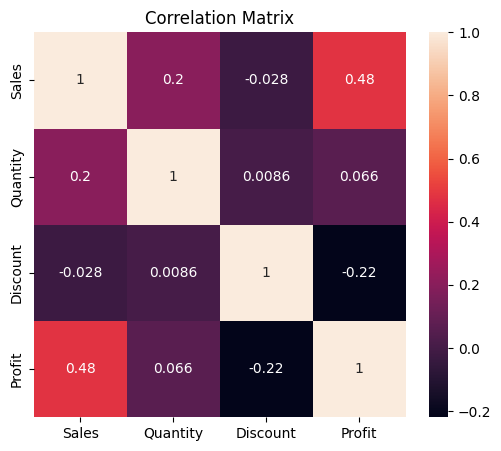

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(mydf.corr(),color = "k", annot=True)
plt.title("Correlation Matrix")
plt.show()

#Profit gained

Profit gained from every State

In [ ]:
subset1 = mydf[['State', 'Profit']]
grouped_data = subset1.groupby('State')['Profit'].sum().reset_index()
print(grouped_data)

                   State      Profit
0                Alabama   5786.8253
1                Arizona  -3427.9246
2               Arkansas   4008.6871
3             California  76381.3871
4               Colorado  -6527.8579
5            Connecticut   3511.4918
6               Delaware   9977.3748
7   District of Columbia   1059.5893
8                Florida  -3399.3017
9                Georgia  16250.0433
10                 Idaho    826.7231
11              Illinois -12607.8870
12               Indiana  18382.9363
13                  Iowa   1183.8119
14                Kansas    836.4435
15              Kentucky  11199.6966
16             Louisiana   2196.1023
17                 Maine    454.4862
18              Maryland   7031.1788
19         Massachusetts   6785.5016
20              Michigan  24463.1876
21             Minnesota  10823.1874
22           Mississippi   3172.9762
23              Missouri   6436.2105
24               Montana   1833.3285
25              Nebraska   2037.0942
2

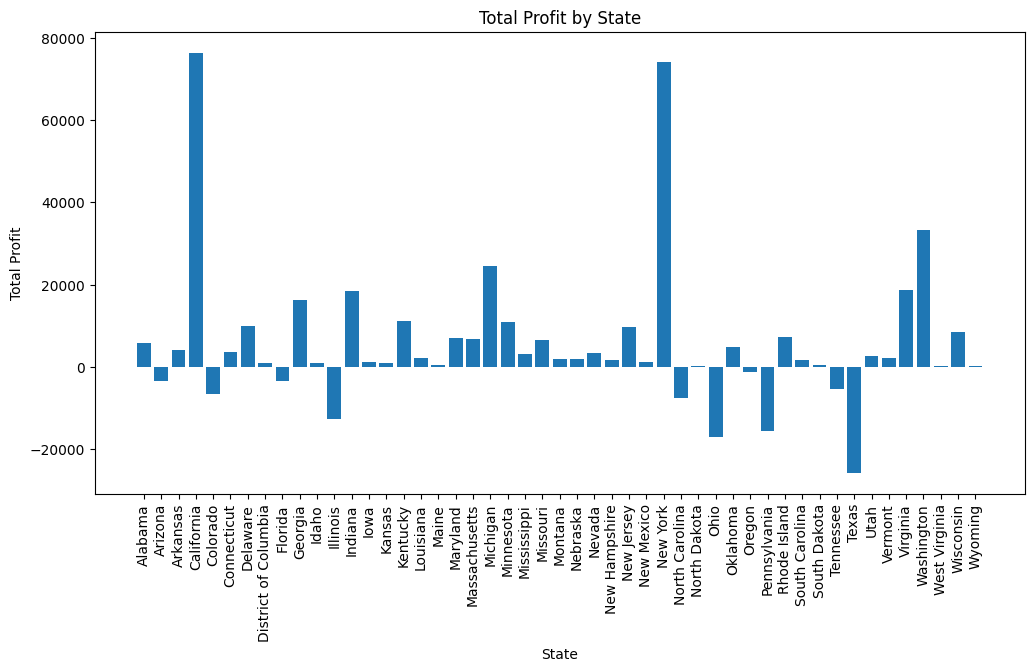

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['State'], grouped_data['Profit'])
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('Total Profit by State')
plt.xticks(rotation=90)
plt.show()

Profit gained in every segment

In [ ]:
subset2 = mydf[['Segment', 'Profit']]
grouped_data1 = subset2.groupby('Segment')['Profit'].sum().reset_index()
print(grouped_data1)

       Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60298.6785


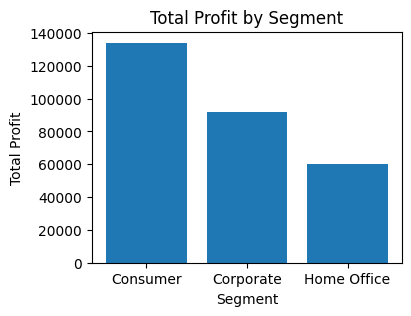

In [ ]:
plt.figure(figsize=(4, 3))
plt.bar(grouped_data1['Segment'], grouped_data1['Profit'])
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit by Segment')
# plt.xticks(rotation=90)
plt.show()

Profit gained in every category

In [ ]:
subset3 = mydf[['Category', 'Profit']]
grouped_data2 = subset3.groupby('Category')['Profit'].sum().reset_index()
print(grouped_data2)

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


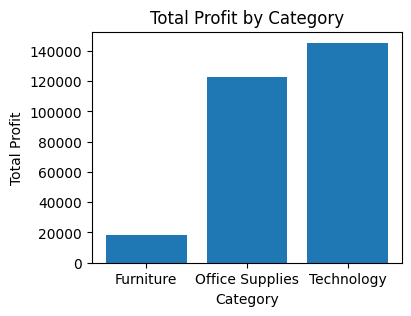

In [ ]:
plt.figure(figsize=(4, 3))
plt.bar(grouped_data2['Category'], grouped_data2['Profit'])
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Category')
# plt.xticks(rotation=90)
plt.show()

#Realtionship between Discount and Profit

In [ ]:
disc_prof = mydf[['Discount', 'Profit']]

Correlation Analysis

In [ ]:
correlation_disc_prof = disc_prof['Discount'].corr(disc_prof['Profit'])
print("Correlation Coefficient: ", correlation_disc_prof)

Correlation Coefficient:  -0.21948745637176803


Scatter Diagram

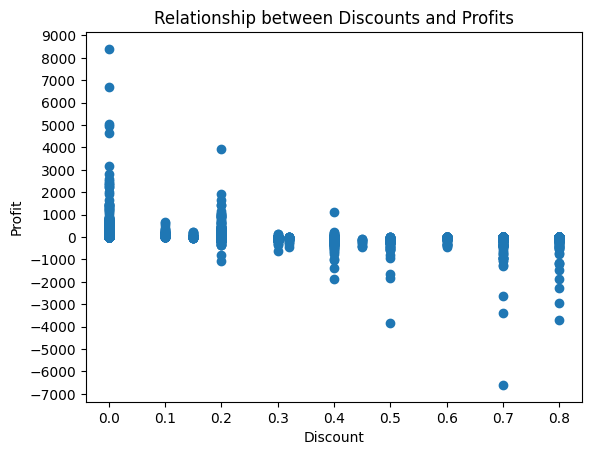

In [ ]:
plt.scatter(disc_prof['Discount'], disc_prof['Profit'])
plt.yticks(range(-7000, 10000, 1000))
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Relationship between Discounts and Profits')
plt.show()

#Relationship of Discount with Profit grouped by Segment

In [ ]:
disc_prof_seg = mydf[['Discount', 'Profit', 'Segment']]

In [ ]:
grouped = disc_prof_seg.groupby('Segment').agg({'Profit': 'mean', 'Discount': 'mean'})
grouped.reset_index(inplace=True)

Correlation analysis

In [ ]:
correlation_d_p_s = disc_prof_seg.groupby('Segment')['Discount'].corr(disc_prof_seg['Profit'])
print("Correlation coefficients:", correlation_d_p_s)

Correlation coefficients: Segment
Consumer      -0.214766
Corporate     -0.218919
Home Office   -0.236795
Name: Discount, dtype: float64


Heat Map

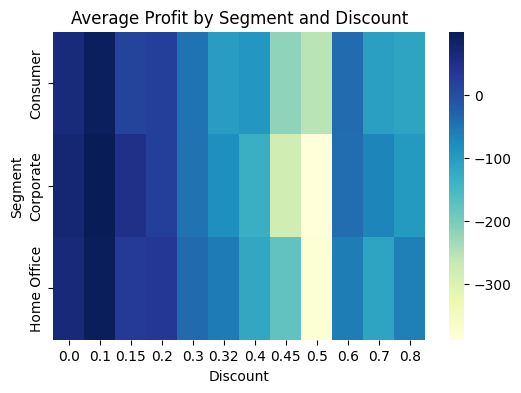

In [ ]:
plt.figure(figsize=(6,4))
heatmap_data = disc_prof_seg.pivot_table(values='Profit', index='Segment', columns='Discount', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.xlabel('Discount')
plt.ylabel('Segment')
plt.title('Average Profit by Segment and Discount')
plt.show()

#Relationship of Discount with Profit grouped by State

In [ ]:
disc_prof_st = mydf[['Discount', 'Profit', 'State']]
grouped1 = disc_prof_st.groupby('State').agg({'Profit': 'mean', 'Discount': 'mean'})
grouped1.reset_index(inplace=True)

Correlation Analysis

In [ ]:
correlation_d_p_st = disc_prof_st.groupby('State')['Discount'].corr(disc_prof_st['Profit'])
print("Correlation coefficients:", correlation_d_p_st)

Correlation coefficients: State
Alabama                      NaN
Arizona                -0.427620
Arkansas                     NaN
California              0.040679
Colorado               -0.298514
Connecticut            -0.126596
Delaware               -0.041501
District of Columbia         NaN
Florida                -0.242797
Georgia                      NaN
Idaho                  -0.424167
Illinois               -0.281032
Indiana                      NaN
Iowa                         NaN
Kansas                       NaN
Kentucky                     NaN
Louisiana                    NaN
Maine                        NaN
Maryland               -0.096850
Massachusetts          -0.318720
Michigan                0.007837
Minnesota                    NaN
Mississippi                  NaN
Missouri                     NaN
Montana                -0.167949
Nebraska                     NaN
Nevada                  0.224731
New Hampshire          -0.280909
New Jersey             -0.053520
New Mexico 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Bar Plot

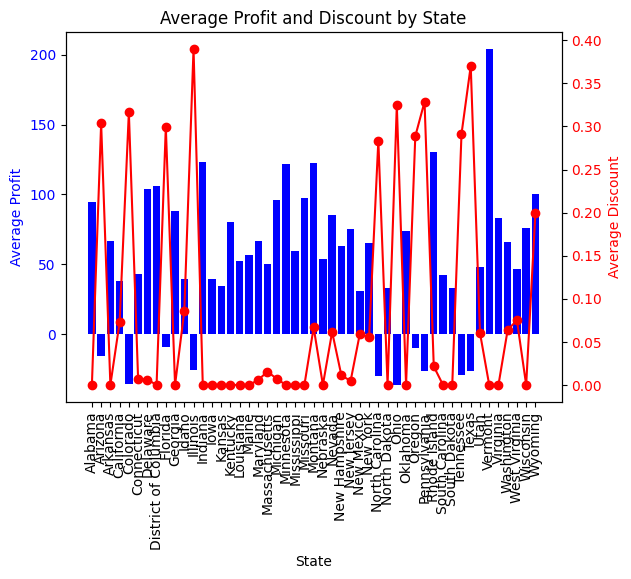

In [ ]:
fig, ax1 = plt.subplots()
ax1.bar(grouped1['State'], grouped1['Profit'], color='blue')
ax1.set_xlabel('State')
plt.xticks(rotation=90)
ax1.set_ylabel('Average Profit', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(grouped1['State'], grouped1['Discount'], color='red', marker='o')
ax2.set_ylabel('Average Discount', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Average Profit and Discount by State')
plt.show()


#Relationship of discount with profits grouped by Category

In [ ]:
disc_prof_cat = mydf[['Discount', 'Profit', 'Category']]
grouped2 = disc_prof_cat.groupby('Category').agg({'Profit': 'mean', 'Discount': 'mean'})
grouped2.reset_index(inplace=True)

Correlation Analysis

In [ ]:
correlation_d_p_c = disc_prof_cat.groupby('Category')['Discount'].corr(disc_prof_cat['Profit'])
print("Correlation coefficients:", correlation_d_p_c)

Correlation coefficients: Category
Furniture         -0.483769
Office Supplies   -0.208787
Technology        -0.268853
Name: Discount, dtype: float64


Bar Plot

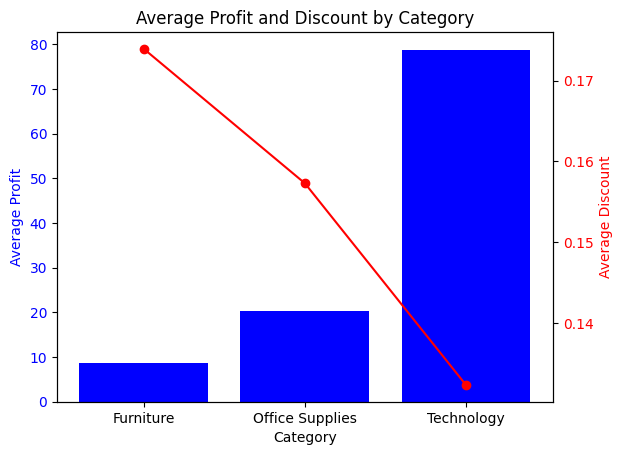

In [ ]:
fig, ax1 = plt.subplots()

ax1.bar(grouped2['Category'], grouped2['Profit'], color='blue')
ax1.set_xlabel('Category')
ax1.set_ylabel('Average Profit', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(grouped2['Category'], grouped2['Discount'], color='red', marker='o')
ax2.set_ylabel('Average Discount', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Average Profit and Discount by Category')
plt.show()

#Relationship between Discounts and Profits for every Category in each Segment

In [ ]:
d_p_c_s = mydf[['Discount', 'Profit', 'Category', 'Segment']]
grouped3 = d_p_c_s.groupby(['Category', 'Segment', 'Discount']).agg({'Profit': 'mean'})
grouped3.reset_index(inplace=True)

Correlation Analysis

In [ ]:
corr_d_p_c_s = d_p_c_s.groupby(['Category', 'Segment'])['Discount'].corr(d_p_c_s['Profit'])
print("Correlation coefficients:", corr_d_p_c_s)

Correlation coefficients: Category         Segment    
Furniture        Consumer      -0.475444
                 Corporate     -0.502483
                 Home Office   -0.477750
Office Supplies  Consumer      -0.193092
                 Corporate     -0.250872
                 Home Office   -0.234382
Technology       Consumer      -0.259420
                 Corporate     -0.254889
                 Home Office   -0.324159
Name: Discount, dtype: float64


Bar Plot

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


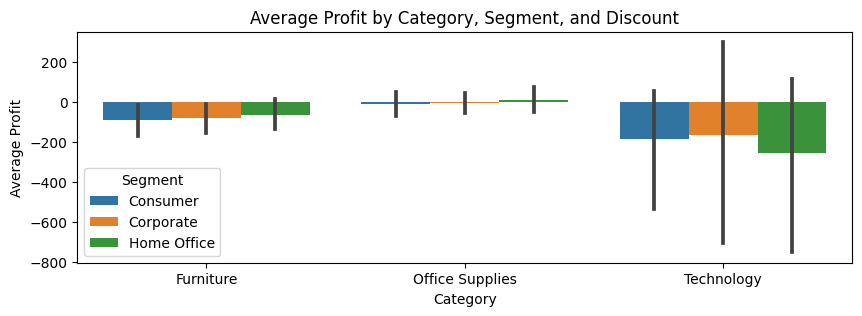

In [ ]:
sns.set_palette('tab10')
fig, ax = plt.subplots(figsize = (10, 3))
sns.barplot(data = grouped3, x = 'Category', y = 'Profit', hue = 'Segment', hue_order = ['Consumer', 'Corporate', 'Home Office'], ax = ax)
ax.set_xlabel('Category')
ax.set_ylabel('Average Profit')
ax.set_title('Average Profit by Category, Segment, and Discount')
ax.legend(title='Segment')

plt.show()


In [ ]:
d_p_c_s_encoded = pd.get_dummies(d_p_c_s, columns=['Category', 'Segment'], drop_first=True)

In [ ]:
X = d_p_c_s_encoded.drop('Profit', axis=1)
y = d_p_c_s_encoded['Profit']

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     119.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.39e-123
Time:                        13:43:55   Log-Likelihood:                -68421.
No. Observations:                9994   AIC:                         1.369e+05
Df Residuals:                    9988   BIC:                         1.369e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   